In [3]:
# Lo basico para arrancar
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# Importar el dataset
df = pd.read_csv('dataset_techtechlam.csv')

# Supongamos que queremos ver la evolución del salario promedio anual a lo largo de los años.
# Agrupar los datos por año y calcular el salario promedio
#salario_promedio_anual = df.groupby('Año')['Salario USD'].mean()
salario_promedio_anual = df.groupby('Año')['Salario USD'].mean()

# Imprimimos el salario promedio
#print(np.around(salario_promedio_anual, decimals=2)) # Lo bloquemos porque no es necesario para esta leccion

# Utilización avanzada de Matplotlib ㅤ

Los Subplots y Layouts en Matplotlib son herramientas que permiten la organización y presentación de múltiples gráficos en una única figura, cada uno con su propio conjunto de ejes.

## Subplots

Los subplots son esencialmente gráficos individuales que residen dentro de una figura más grande, cada uno ocupando su propio espacio dentro de la figura y teniendo su propio conjunto de ejes. Esto es útil cuando deseas mostrar varios gráficos diferentes lado a lado para comparación directa, o cuando quieres mostrar diferentes aspectos o dimensiones de un conjunto de datos.

## Layouts

Los layouts se refieren a la forma en que los subplots están organizados dentro de una figura. Un buen layout asegura que los gráficos sean fáciles de leer y comprender, y que la figura en su conjunto sea estéticamente agradable.

### Ejemplos

Subplots

A continuación desarrollaremos un ejemplo de subplots, en base al caso de la clase, y luego explicaremos cada método en detalle.

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15648\1929786752.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(mean_salaries.index, rotation=45)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_15648\1929786752.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(mean_vacaciones.index, rotation=45)


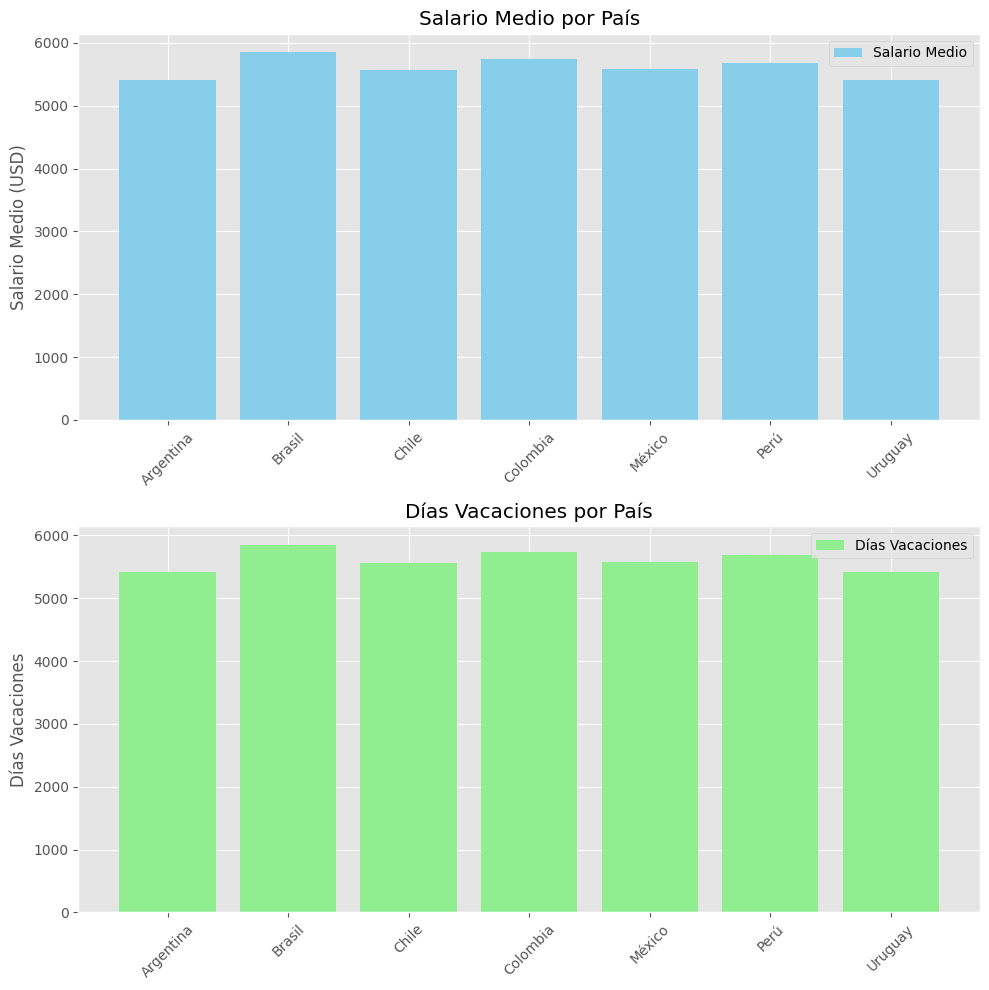

In [8]:
# Calculando el salario medio y la media de satisfacción por país
mean_salaries = df.groupby('Ubicación')['Salario USD'].mean()
mean_vacaciones = df.groupby('Ubicación')['Días Vacaciones'].mean()

# Estableciendo un estilo
plt.style.use('ggplot')

# Creando la figura y los ejes para dos subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))  # 2 filas, 1 columna
# Ahora las identifico, antes era solo ax, ahora es ax1, y la otra ax2. Podrian ser mas

# Primer subplot: Salario Medio
ax1.bar(mean_salaries.index, mean_salaries.values, color='skyblue', label='Salario Medio')
ax1.legend(loc='upper right')
ax1.set_title('Salario Medio por País')
ax1.set_ylabel('Salario Medio (USD)')
ax1.grid(True)
ax1.set_xticklabels(mean_salaries.index, rotation=45)

# Segundo subplot: Días de Vacaciones
ax2.bar(mean_vacaciones.index, mean_salaries.values, color='lightgreen', label='Días Vacaciones')
ax2.legend(loc='upper right')
ax2.set_title('Días Vacaciones por País')
ax2.set_ylabel('Días Vacaciones')
ax2.grid(True)
ax2.set_xticklabels(mean_vacaciones.index, rotation=45)

# Ajuste automático del layout
plt.tight_layout()

# Mostrando el gráfico
plt.show()

Descripción de los métodos utilizados:

•
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10)): crea una figura y dos subplots (ax1 y ax2). La figura tendrá 2 filas y 1 columna de subplots y un tamaño de 10x10 pulgadas.

•
ax1.bar() y ax2.bar(): cada uno crea un gráfico de barras en su respectivo subplot. ax1 se utiliza para el salario medio y ax2 para el índice de satisfacción.

•
ax1.legend() y ax2.legend(): añaden leyendas a cada subplot.

•
ax1.set_title() y ax2.set_title(): establecen títulos para cada subplot.

•
ax1.set_ylabel() y ax2.set_ylabel(): establecen las etiquetas del eje Y para cada subplot.

•
ax1.grid() y ax2.grid(): añaden una cuadrícula a cada subplot para mejorar la legibilidad.

•
ax1.set_xticklabels() y ax2.set_xticklabels(): establecen las etiquetas del eje X para cada subplot y rotan las etiquetas para evitar la superposición.

•
plt.tight_layout(): ajusta automáticamente los parámetros de la subtrama para evitar solapamientos entre los subplots.

Manejo de fechas y horas

El manejo de fechas y horas en Matplotlib se facilita con el módulo matplotlib.dates. Es común en datos financieros, registros de eventos, y cualquier análisis de series temporales. Veamos un ejemplo:

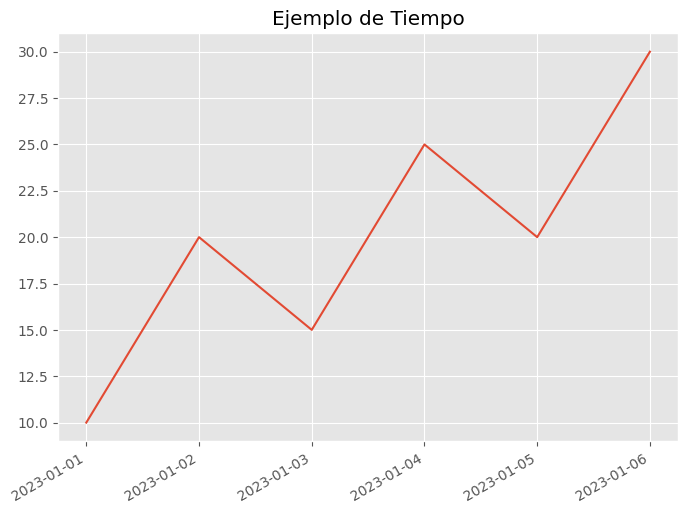

In [9]:
# Calculando el salario medio y la media de satisfacción por país
mean_salaries = df.groupby('Ubicación')['Salario USD'].mean()
mean_vacaciones = df.groupby('Ubicación')['Días Vacaciones'].mean()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates  # Llamamos el modulo mdates
import pandas as pd

# Crear un rango de fechas
dates = pd.date_range('20230101', periods=6)

# Datos de ejemplo
values = [10, 20, 15, 25, 20, 30]

plt.figure(figsize=(8,6))
plt.plot(dates, values)

# Formatear el eje x para mostrar las fechas correctamente
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
# Con gca obtengo los valores actuales, get current action ?
# Luego les hago un formateo a los datos y que me los formate de esa manera
# set_major_locator destruye las marcas del eje x y se coloca una marca por dia en este caso

plt.gcf().autofmt_xdate() # Auto-formatea las fechas para que se muestren correctamente
plt.title('Ejemplo de Tiempo')
plt.show()

Donde:

•
plt.gca() obtiene los ejes actuales (gca = Get Current Axes) del gráfico.

•
set_major_formatter() se usa con mdates.DateFormatter('%Y-%m-%d') para definir el formato de las fechas en el eje X. Aquí se elige el formato año-mes-día.

•
set_major_locator() se usa con mdates.DayLocator() para definir cómo se distribuyen las marcas en el eje X. En este caso, se coloca una marca por día.

•
plt.gcf().autofmt_xdate() ajusta automáticamente el formato de las fechas en el eje X para que sean más legibles, inclinándolas si es necesario.

###  Exportación. Compartir gráficos

Exportar gráficos para su uso en presentaciones, documentos o páginas web es una parte muy importante de compartir tus hallazgos. Matplotlib facilita la exportación de figuras a diferentes formatos como PNG, PDF, SVG, etc.

La utilización del método plt.savefig() resulta muy sencillo, solo debes tener en cuenta de que tienes que utilizarlo antes de invocar al método plt.show(), debido a que si lo haces después, la ventana estará cerrada y tus archivos quedarán en blanco.

plt.savefig() posee los siguientes atributos:

•
fname: string o objeto similar a un archivo. Es el nombre del archivo o un objeto de archivo en el que se guardará la figura. Puedes especificar la ruta completa y el nombre del archivo.

•
dpi: el número de puntos por pulgada (DPI) del gráfico guardado. Mayor DPI significa mayor resolución. Por defecto, Matplotlib usará el valor de DPI de la figura, pero puedes establecer un valor específico para cambiar la resolución del archivo guardado.

•
format: string que define el formato de salida. Puede ser 'png', 'pdf', 'svg', 'ps', 'eps'..., dependiendo de los backends soportados por tu instalación de Matplotlib. Si no se especifica, Matplotlib intentará deducir el formato a partir de la extensión del archivo especificado en fname.

•
bbox_inches: determina qué parte de la figura se guarda. Si se establece en 'tight', intentará recortar la figura de manera que no haya contenido vacío alrededor de la imagen. Esto es útil para eliminar bordes blancos innecesarios. Por defecto, es None, lo que significa que se utiliza el bbox de la figura.

•
pad_inches: es el espaciado a añadir alrededor de la figura cuando bbox_inches está configurado para 'tight'. Esto especifica cuánto espacio se debe dejar alrededor de los bordes de la figura. Por defecto, es 0.1.

•
transparent: si se establece en True, el fondo de la figura se guardará como transparente.

•
facecolor y edgecolor: estos parámetros determinan el color de fondo y el color del borde de la figura, respectivamente. Esto es útil si necesitas que el fondo o los bordes tengan un color diferente al predeterminado.

•
orientation: la orientación de la página, que puede ser 'portrait' o 'landscape'. Esto es más relevante para formatos como PDF.

•
metadata: un diccionario que contiene metadatos que se incluirán en el archivo guardado. Esto es particularmente útil para formatos como PDF y SVG. Los datos que se pueden incluir varían según el formato.

Volviendo a la práctica, corre el siguiente código y tendrás tus gráficos en formato PNG y PDF:

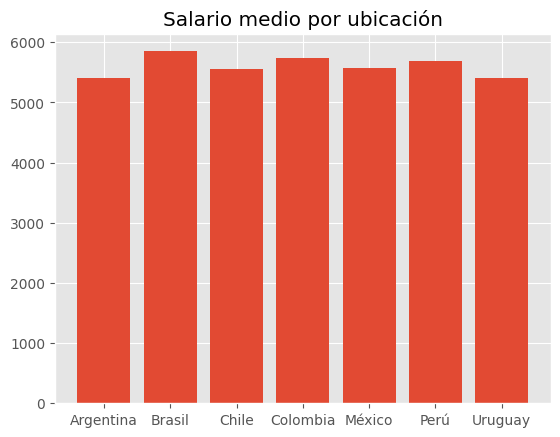

In [10]:
mean_salaries = df.groupby('Ubicación')['Salario USD'].mean()
# Creando la figura y los ejes
fig, ax = plt.subplots()

# Creando el diagrama de dispersión
ax.bar(mean_salaries.index, mean_salaries.values)
plt.title('Salario medio por ubicación')

# Exportar la figura
plt.savefig('mi_grafico.png', dpi=300) # Guardar como PNG con alta resolución
plt.savefig('mi_grafico.pdf', format='pdf') # Guardar como PDF

# Mostrando el gráfico
plt.show()